# 2차원 데이터 시각화

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

2차원 데이터를 시각화하는 다양한 방식을 소개한다.

## 서브플롯 관리

50명 학생의 영어와 수학 점수를 포함하는 2차원 데이터를 이용하여
두 종류의 점수를 활용한 산점도를 다음과 같이 간단하게 그릴 수 있다.
먼저 데이터를 불러온다.

In [65]:
# 데이터 불러오기
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')

# 영어 점수와 수학 점수 구분
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

동일한 산점도를 그리는 코드 두 개를 소개한다.
코드에 사용된 각각의 명령문의 역할은 주석으로 설명된다.

**그래프 코드 1**

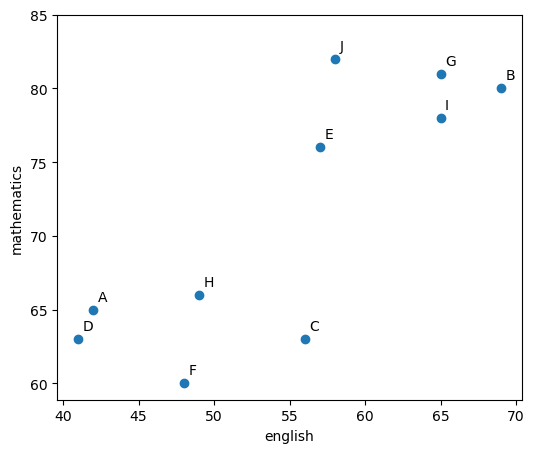

In [108]:
# 그래프의 크기 지정
plt.rc('figure', figsize=(6, 5))

# 산점도 그리기
plt.scatter(eng_scores[:10], math_scores[:10])

# 축 이름 지정
plt.xlabel('english')
plt.ylabel('mathematics')

# 학생 데이터 각각에 이름 추가
for i, name in enumerate(scores_df.index):
    plt.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
plt.xticks(range(40, 75, 5))
plt.yticks(range(60, 90, 5))

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

**그래프 코드 2**

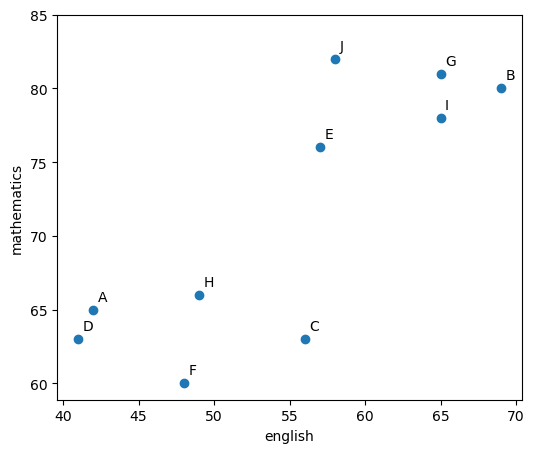

In [109]:
# Figure 객체 지정
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(eng_scores[:10], math_scores[:10])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 학생 데이터 각각에 이름 추가
for i, name in enumerate(scores_df.index):
    ax.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax.set_xticks(range(40, 75, 5))
ax.set_yticks(range(60, 90, 5))

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

두 그래프 코드의 차이점은 `Figure` 객체와 서브플롯의 활용에 있다.

**`Figure` 객체**

`Figure` 객체는 다음과 생성하며 그림 액작의 기능을 수행한다.

```python
fig = plt.figure()
```

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures.png?raw=true" style="width:550px"></div></p>

그림 출처: [Matplotlib에서 Figure와 Axes 이해하기 (Basic)](https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic)

**서브플롯 추가**

서브플롯은 그래프를 그릴 때 필요한 도화지에 해당한다.
아래 코드는 준비된 `Figure` 객체에 하나의 서브플롯을 추가한다.

```python
ax = fig.add_subplot(1, 1, 1)
```

위 코드의 실행결과는 다음과 같이 액자에 한 장의 도화지를 준비한 것과 동일하다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures_subplots.png?raw=true" style="width:670px"></div></p>

그림 출처: [Matplotlib에서 Figure와 Axes 이해하기 (Basic)](https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic)

반면에 아래 코드는 두 개의 서브플롯을 추가한다.

```python
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
```

위 코드는 액자에 두 장의 도화지를 좌우로 배치시키는 효과를 낸다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures_subplots121.png?raw=true" style="width:670px"></div></p>

그림 출처: [Matplotlib에서 Figure와 Axes 이해하기 (Basic)](https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic)

**`Axes` 객체와 `add_subplot()` 메서드의 인자**

`add_subplot()` 함수는 직사각형 모양으로 서브플롯을 배치시킬 때 필요한 세 개의 정보를 인자로 받는다.

- 첫째와 둘째 인자: 도화지 배치를 지정하는 행렬의 크기
- 셋째 인자: 생성되는 서브플롯의 인덱스. 1부터 시작.

예를 들어 위 코드에서 `ax2` 변수는 (1, 2) 모양으로 배치된 두 개의 서브플롯 중에서 둘째, 즉 오른편에 위치한 서브플롯의
정보를 가리킨다.

`ax1`과 `ax2` 두 변수는 (1, 2) 모양으로 배치된 두 개의 서브플롯 각각의 위치를 가리키는 `Axes` 객체다.
특정 서브플롯에 그래프를 그리려면 `ax1` 또는 `ax2`를 선택하여 `scatter()`와 같은 함수를 호출하면 된다.

예를 아래 코드는 10명 학생의 산점도와 함께 50명 전체의 산점도를 좌우로 나란히 배치시킨다.

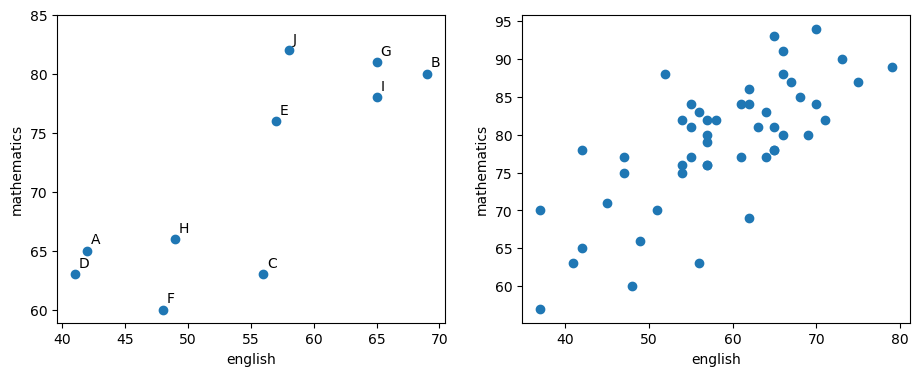

In [122]:
# Figure 객체 지정
fig = plt.figure(figsize=(11, 4))

# 왼쪽 도화지 지정
ax1 = fig.add_subplot(1, 2, 1)

# 왼쪽 도화지에 10명의 산점도 그리기
ax1.scatter(eng_scores[:10], math_scores[:10])
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

# 학생 데이터 각각에 이름 추가
for i, name in enumerate(scores_df.index):
    ax1.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax1.set_xticks(range(40, 75, 5))
ax1.set_yticks(range(60, 90, 5))
    
# 오른쪽 도화지 지정
ax2 = fig.add_subplot(1, 2, 2)

# 오른쪽 도화지에 50명의 산점도 그리기
ax2.scatter(eng_scores, math_scores)

# x-축, y-축 이름 지정
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

plt.show()

반면에 아래 코드는 두 개의 서브플롯을 위 아래로 배치시킨다.
`add_subplot()` 함수의 인자가 `(2, 1, 1)`와 `(2, 1, 2)`가 사용됨에 주의한다.

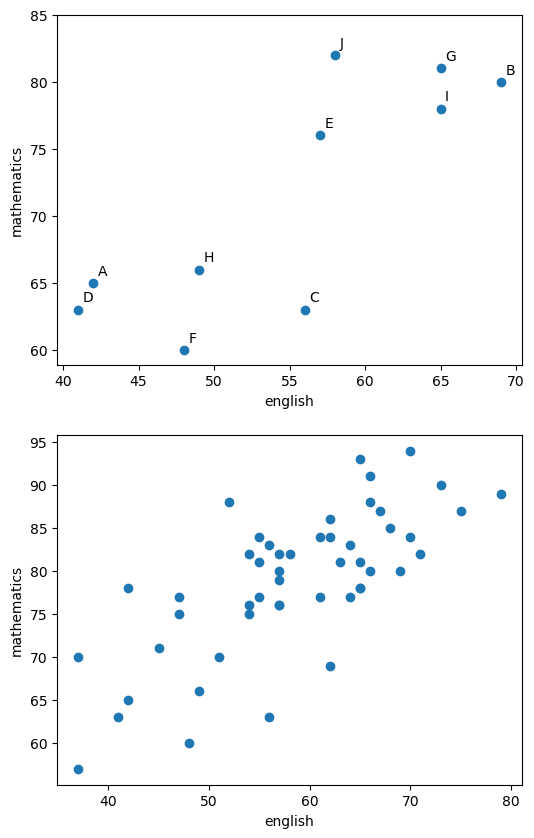

In [121]:
# Figure 객체 지정
fig = plt.figure(figsize=(6, 10))

# 왼쪽 도화지 지정
ax1 = fig.add_subplot(2, 1, 1)

# 왼쪽 도화지에 10명의 산점도 그리기
ax1.scatter(eng_scores[:10], math_scores[:10])
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

# 학생 데이터 각각에 이름 추가
for i, name in enumerate(scores_df.index):
    ax1.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax1.set_xticks(range(40, 75, 5))
ax1.set_yticks(range(60, 90, 5))
    
# 오른쪽 도화지 지정
ax2 = fig.add_subplot(2, 1, 2)

# 오른쪽 도화지에 50명의 산점도 그리기
ax2.scatter(eng_scores, math_scores)

# x-축, y-축 이름 지정
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

plt.show()

In [18]:
type(fig)

matplotlib.figure.Figure

`matplotlib.pyplot` 라이브러리를 활용하는 모든 그래프는 `Figure` 객체로 관리된다.
그래프를 그리려면 

모든 그래프는 `Figure` 객체 내에 존재하며, `plt.figure()` 함수에 의해 생성된다.

```python
fig = plt.figure()
```

`Figure` 객체 내에 그래프를 그리려면 서브플롯(subplot)을 지정해야 한다.
아래 코드는 `add_subplot()` 함수를 이용하여 지정된 `Figure` 객체안에 그래프를 그릴 공간을 준비한다.
(nrows, ncols, index) 형식의 인자의 의미는 다음과 같다.

- nrows: 이미지 행의 개수
- ncols: 이미지 칸의 개수
- index: 이미지의 인덱스. 1부터 시작.

만약 2x2 모양으로 총 4개의 이미지를 생성하려면 아래와 같이 실행한다.

```python
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
```

**그래프 삽입하기**

두 가지 방식으로 각각의 서브플롯에 그림을 삽입할 수 있다.

*방식 1: `matplotlib.pyplot.plot()` 함수 활용*

이 방식은 항상 마지막에 선언된 서브플롯에 그래프를 그린다.
예를 들어 아래 코드는 무작위로 선택된 50개의 정수들의 누적합으로 이루어진 데이터를
파선 그래프로 그린다.

`Figure` 객체의 크기는 `plt.rc()` 함수를 이용해서 아래와 같이 지정한다.
`plt.rc()` 함수의 자세한 활용법은 잠시 뒤에 보다 자세히 살펴 본다.

In [8]:
plt.rc('figure', figsize=(10, 6))

이제 네 개의 이미지가 보다 적절한 크기로 그려진다.

**서브플롯 관리**

`matplotlib.pyplot.subplots()` 함수는 여러 개의 서브플롯을 포함하는 `Figure` 객체를 관리해준다.
예를 들어, 아래 코드는 2x3 크기의 서브플롯을 담은 (2,3) 모양의 넘파이 어레이로 생성한다.

* 반환값: `Figure` 객체와 지정된 크기의 넘파이 어레이. 각 항목은 서브플롯 객체임.

## 회귀직선

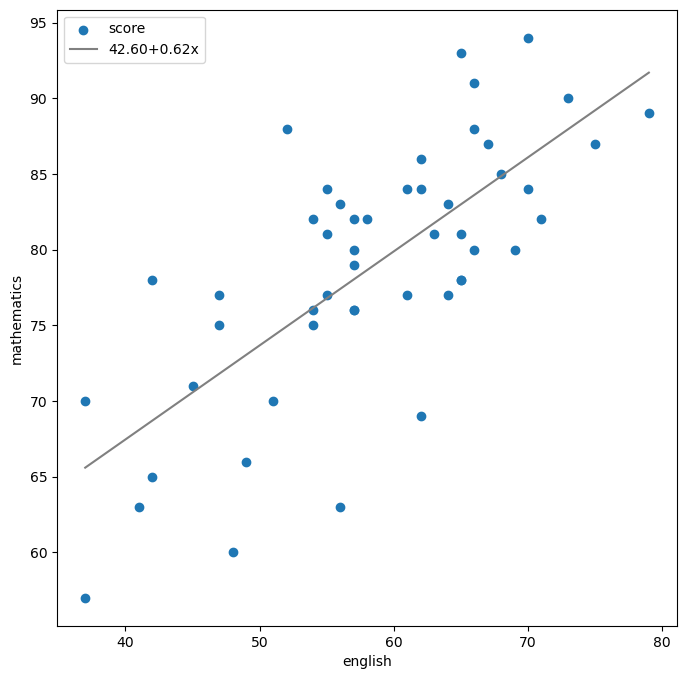

In [123]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

## 히트맵

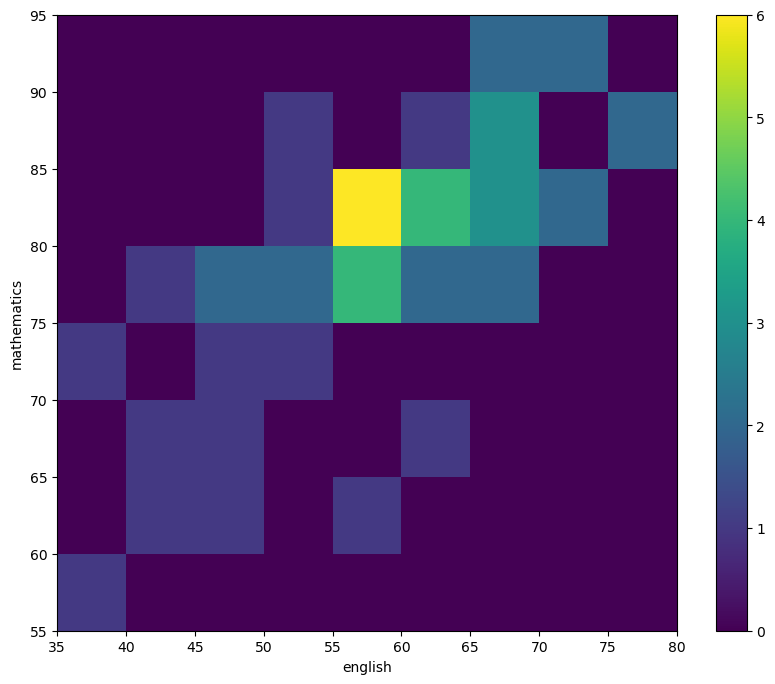

In [124]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

## 예제: 앤스컴의 데이터 4중주

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/anscombe_quartet.png" style="width:750px"></div></p>

In [138]:
data = np.load('../data/ch03_anscombe.npy')

In [140]:
data.shape

(4, 11, 2)

In [144]:
data[3]

array([[ 8.  ,  6.58],
       [ 8.  ,  5.76],
       [ 8.  ,  7.71],
       [ 8.  ,  8.84],
       [ 8.  ,  8.47],
       [ 8.  ,  7.04],
       [ 8.  ,  5.25],
       [19.  , 12.5 ],
       [ 8.  ,  5.56],
       [ 8.  ,  7.91],
       [ 8.  ,  6.89]])

In [125]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = pd.read_csv(data_url+'anscombe.csv')

In [126]:
anscombe_data

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [127]:
anscombe_data.describe()

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


In [146]:
data_0 = anscombe_data.iloc[:, [0, 4]]
data_0

,x1,y1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33
5,14,9.96
6,6,7.24
7,4,4.26
8,12,10.84
9,7,4.82


In [148]:
data_1 = anscombe_data.iloc[:, [1, 5]]
data_1

,x2,y2
0,10,9.14
1,8,8.14
2,13,8.74
3,9,8.77
4,11,9.26
5,14,8.10
6,6,6.13
7,4,3.10
8,12,9.13
9,7,7.26


In [136]:
for i, data in enumerate(anscombe_data):
    print(i, data)

0 x1
1 x2
2 x3
3 x4
4 y1
5 y2
6 y3
7 y4


TypeError: string indices must be integers, not 'tuple'

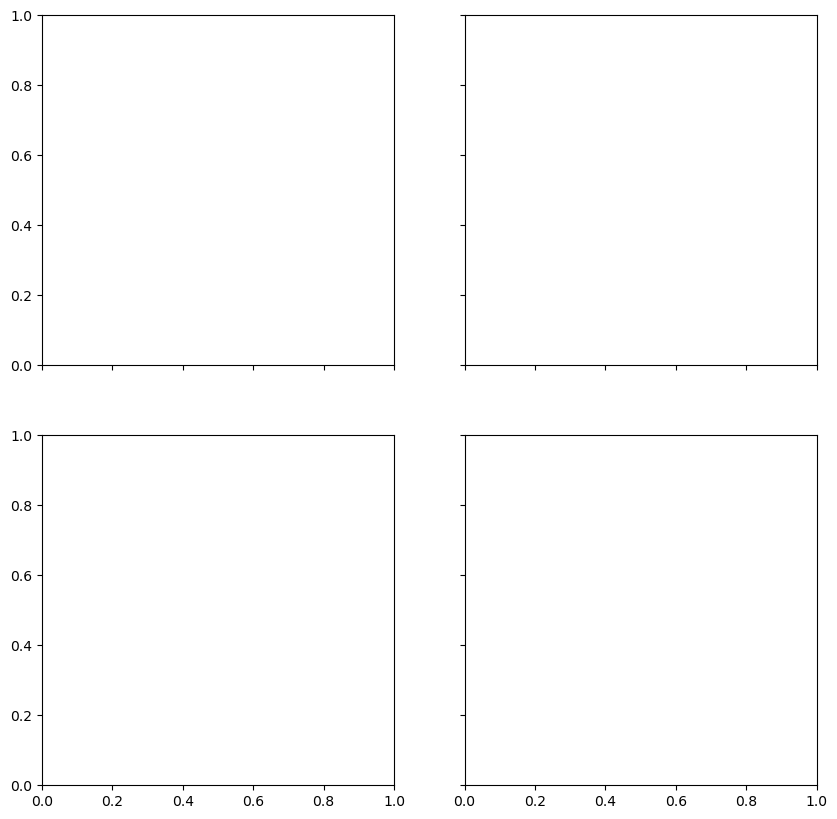

In [132]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()